**Imporitng the required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

**STEP 1: DATA MINING(Reading and understanding the dataset)**

In [ ]:
bikesharing_df=pd.read_csv('/content/drive/MyDrive/Linear regression assignment/day.csv')
bikesharing_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
bikesharing_df.shape

(730, 16)

In [ ]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bikesharing_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [ ]:
bikesharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
bikesharing_df.size

11680

In [ ]:
bikesharing_df.ndim

2

In [ ]:
bikesharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
bikesharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [ ]:
bikesharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

**Handling missing values(Lets check if there are any null values in the data)**

In [ ]:
bikesharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As we can see there are no null values in any of the columns so we can proceed with our further analysis.


**STEP 2 : DATA PREPROCESSING**

In [ ]:
#Lets inspect the data and drop the columns which are not significant to our analysis.
#Lets check the data dictionary of the given dataset and deicde which columns to drop.

In [ ]:
#Lets check the columsn once
bikesharing_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

**Drop the columns which are not significant for our analysis by observing the dataset characteristics given.**


*   As we see instant is just acting like an index which can be dropped.
*   And also dteday column can be dropped as we are not doing any day to day analysis.
*   The columns casual and registered shows how many casual users are there and out of them how many are regsitered. So we can drop these two columns as they have to kept private and not important for analysis.





In [ ]:
#Before dropping date column, let us add a column days_old variable which indicates how old is the business
bikesharing_df['days_old'] = (pd.to_datetime(bikesharing_df['dteday'],format= '%d-%m-%Y')- pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [ ]:
#Drop the instant column as this is not associated with target variable.
bikesharing_df.drop(['instant'], axis = 1, inplace = True)


In [ ]:
#Drop the dteday column because we already have year and month column
bikesharing_df.drop(['dteday'], axis = 1, inplace = True)

In [ ]:
#Drop the casual and registered column as we have the cnt column which is a sum of these two columns.
bikesharing_df.drop(['casual'], axis = 1, inplace = True)
bikesharing_df.drop(['registered'], axis = 1, inplace = True)

In [ ]:
#Check the dataframe now
bikesharing_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

**STEP 3: EDA**

In [ ]:
#Lets check for the missing values in the dataset
bikesharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

We have already seen that there are no missing values to be handled and we are good to go

**Handling outliers**

In [ ]:
#We have to check whether there are any outliers in any of the columns
#To check this lets explore the columns and the number of unique values present in the columns
bikesharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [ ]:
bikesharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

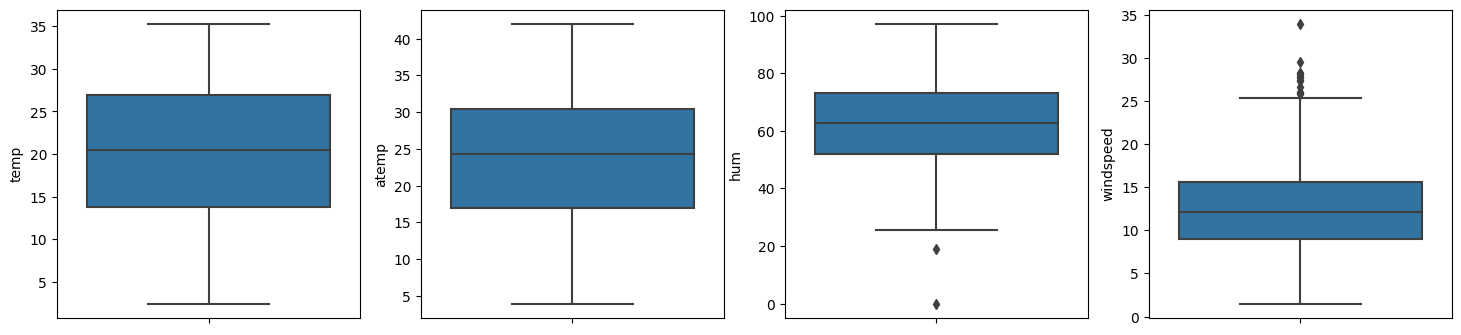

In [ ]:
#We have to deal with comntinuous variables which we feel there may be outliers
#Such variables here are temp,atemp,hum,windspeed
#Lets draw a boxplot to find the outliers in these columns
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikesharing_df)
    i+=1

From the above box plot we can see that there are almost no outliers and we are good to continue with next step

 **Fixing the correct data types to the variables**

In [ ]:
#Lets check if all the datatypes are exact to the particular columns.
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


As we see here the columns season,month,weekday,weathersit,working day are integers which are not supposed to be.Lets fix them.

In [ ]:
#Lets convert these into categorical variables
bikesharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing_df.mnth = bikesharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikesharing_df.weekday = bikesharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikesharing_df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1   moderate  14.110847   
1  spring   0  jan        0     tue           1   moderate  14.902598   
2  spring   0  jan        0     wed           1       good   8.050924   
3  spring   0  jan        0     thu           1       good   8.200000   
4  spring   0  jan        0     fri           1       good   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

**Lets check the correlation now**

In [ ]:
bikesharing_df.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   
days_old    0.866026  0.016275   -0.015171  0.150738  0.152773  0.016080   

            windspeed       cnt  days_old  
yr          -0.011624  0.569728  0.866026  
holiday      0.006257 -0.068764  0.016275  
workingday  -0.002453 -0.027640 -0.015171  
temp        -0.158186  0.627044  0.150738  
atemp       -0.183876  0.630685  0.152773  
hum         -0.248506 -0.098543  0.016080  
windspeed    1.000000 -0.235132 -0.112667  
cnt         -0.235132  1.000000  0.629896  
days_old    -0.112667  0.629896  1.000000

In [ ]:
#From the above correlation matrix we can say that the variables temp,atemp,days_old are highly correlated with the target variable cnt.
#And also temp and atemp are highly correlated with each other.

Lets draw a pair plot to understand the correlation between target and continuous variables

<Figure size 1500x3000 with 0 Axes>

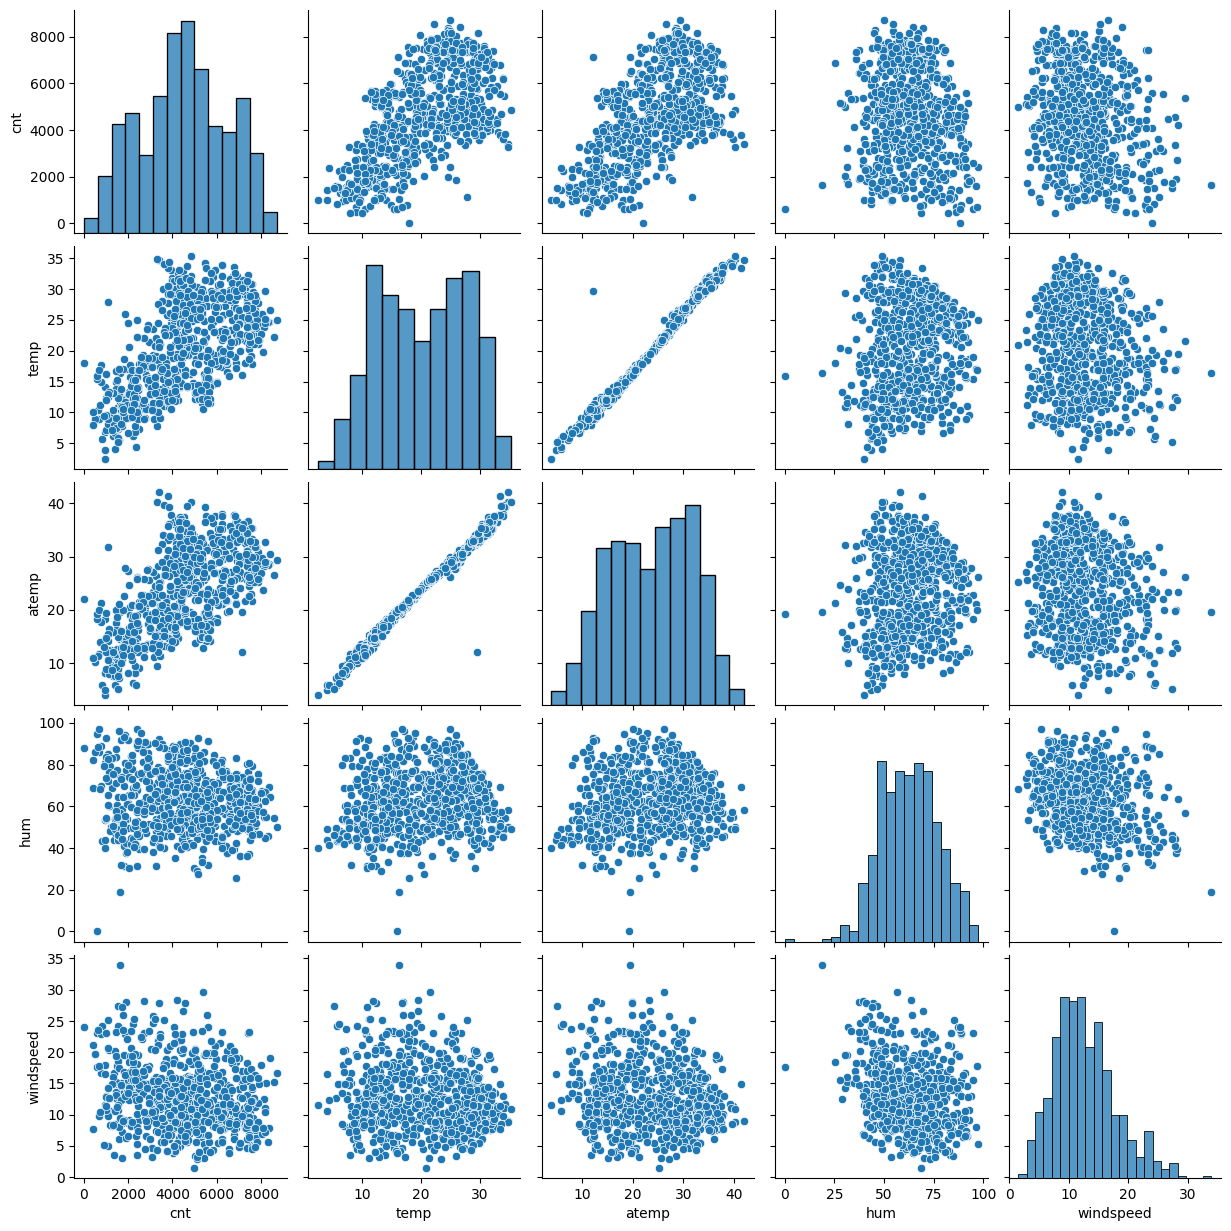

In [ ]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikesharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [ ]:
#From the above pair plot we can easily say that temp and atemp are highly correalted with target variable.

**STEP 4: Data Visualization**(Lets draw a pair plot for the entire dataframe to see the linear relationship)

<Figure size 2000x1500 with 0 Axes>

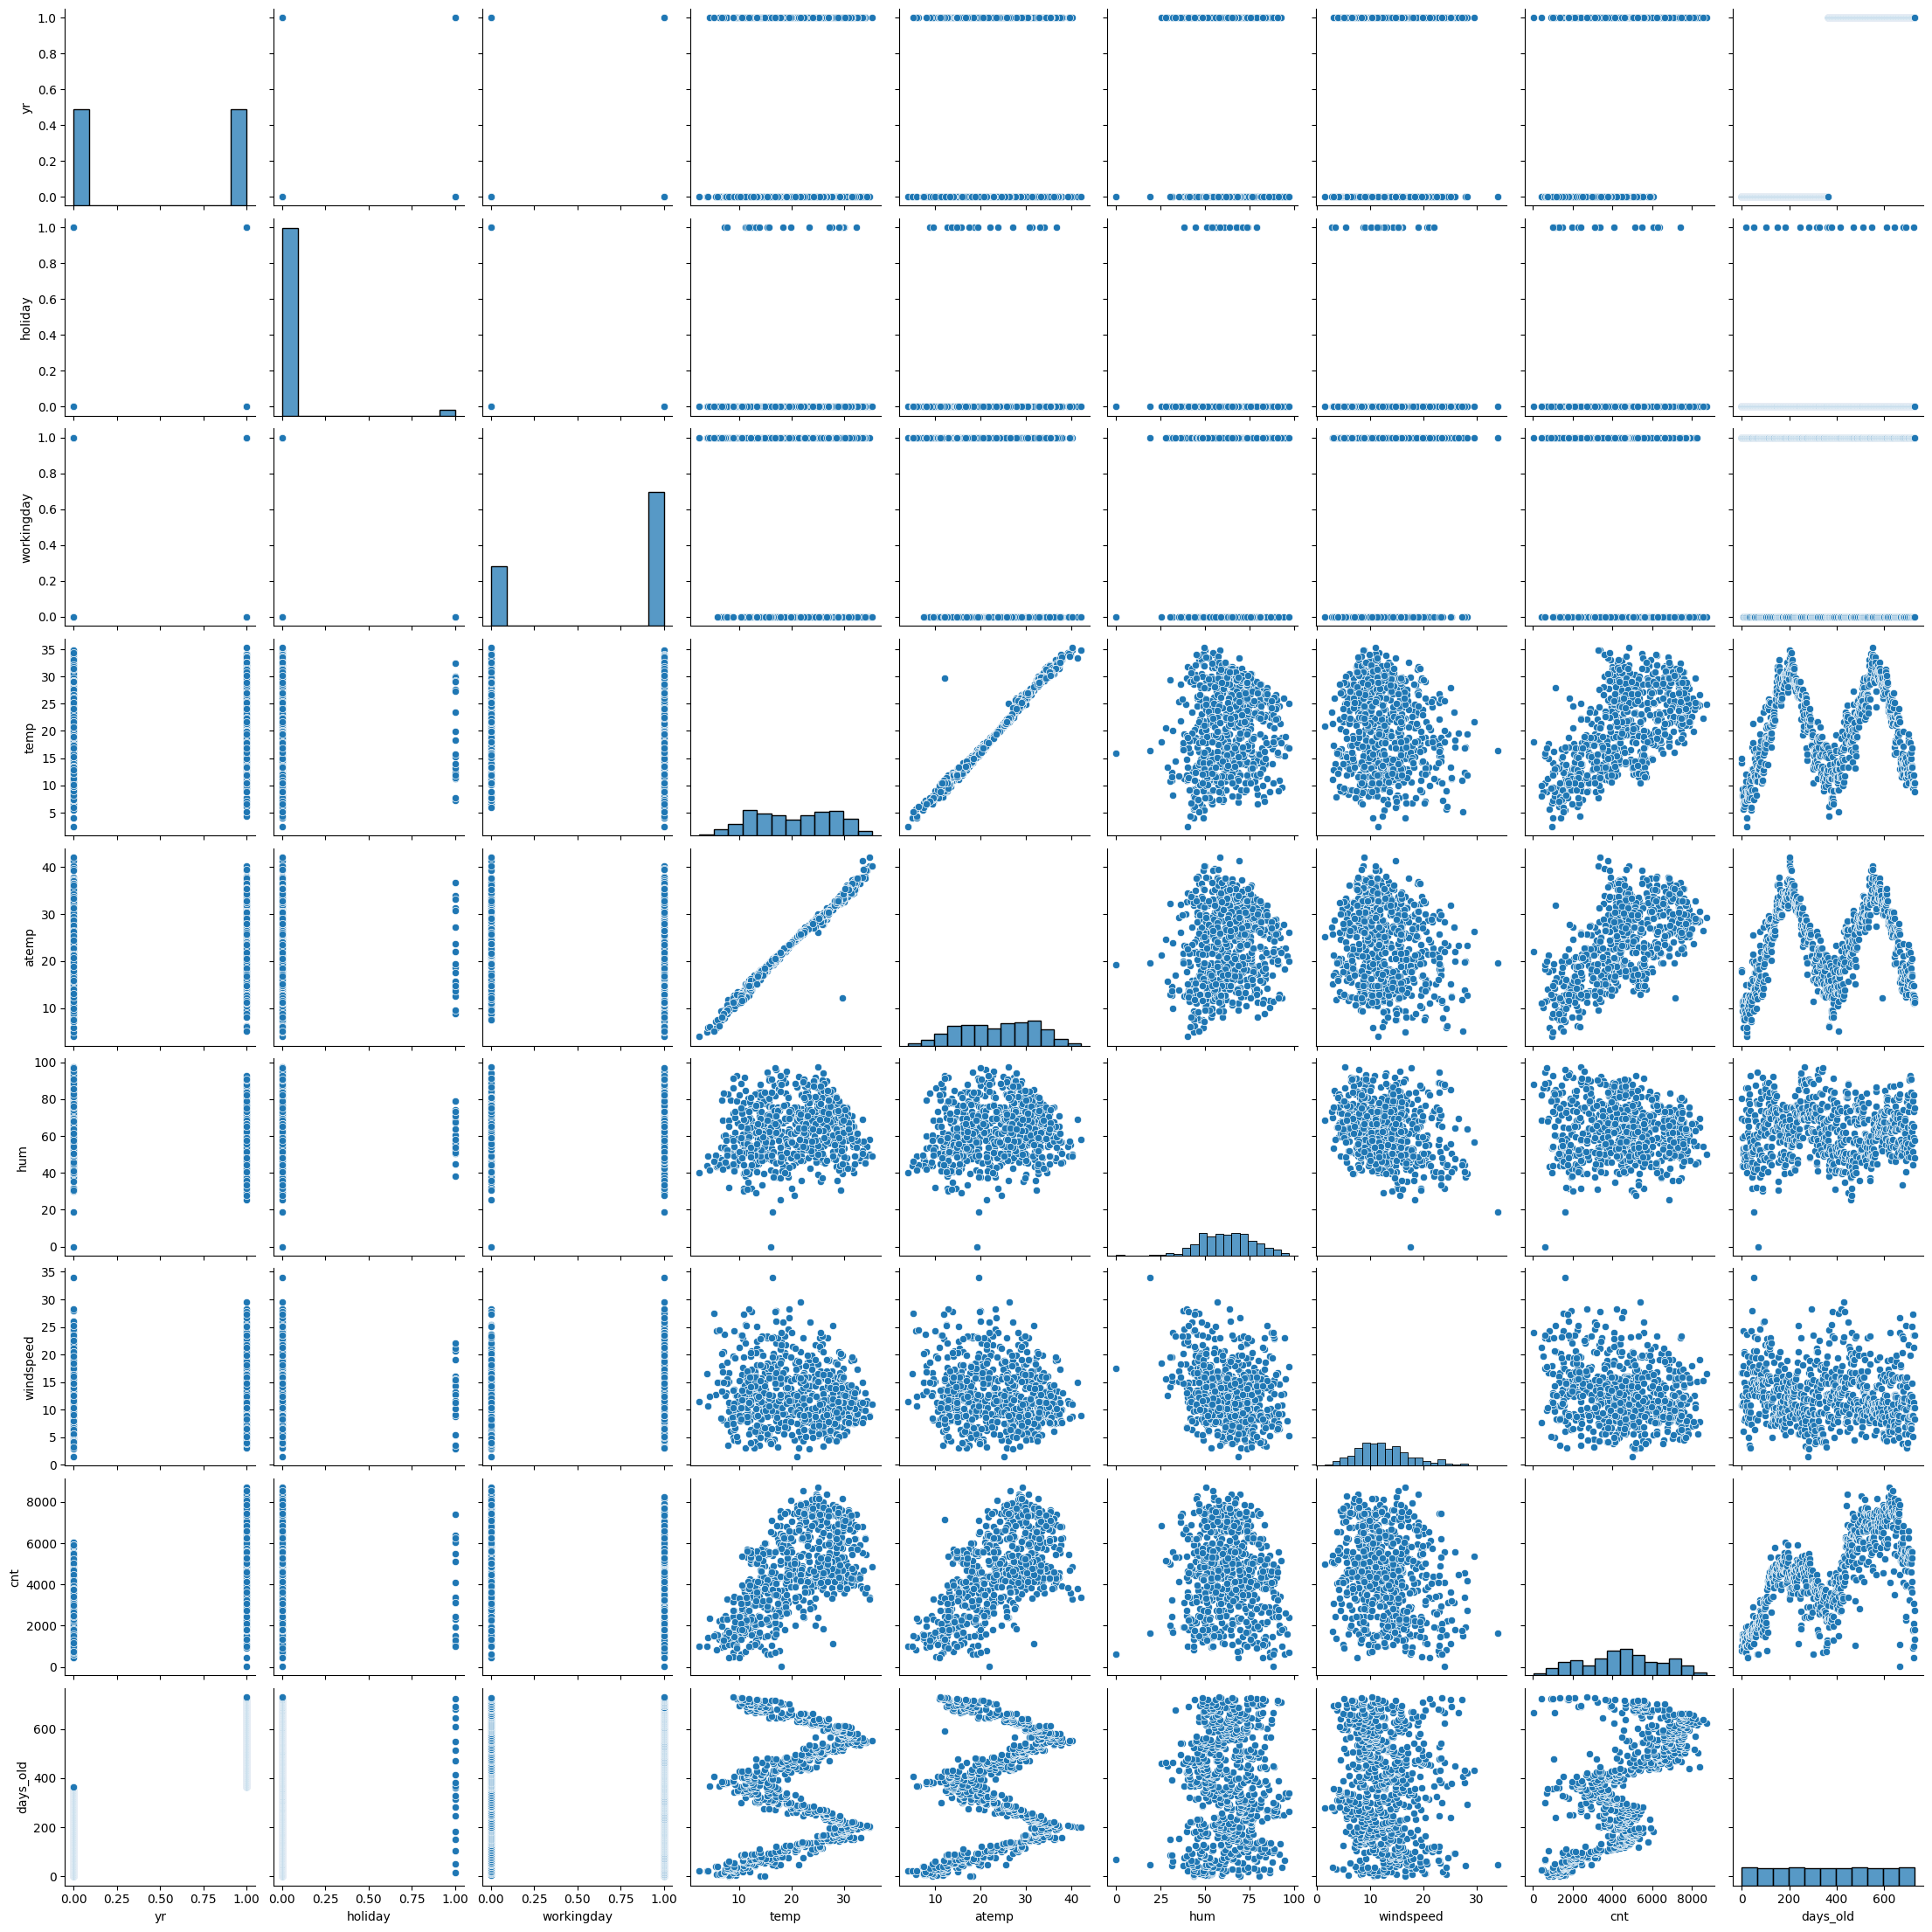

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(bikesharing_df)
plt.show()

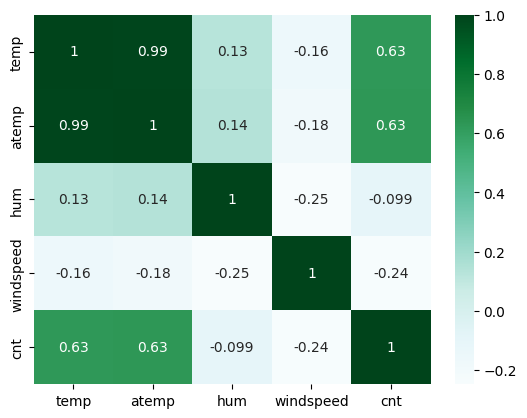

In [ ]:
#Lets check the contiuous variables relationship with each other using heat maps
sns.heatmap(bikesharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

We see that the variables temp and atemp are mostly the same and we can say that the variable atemp is derived from the variable temp.We can drop atemp from here onwards.

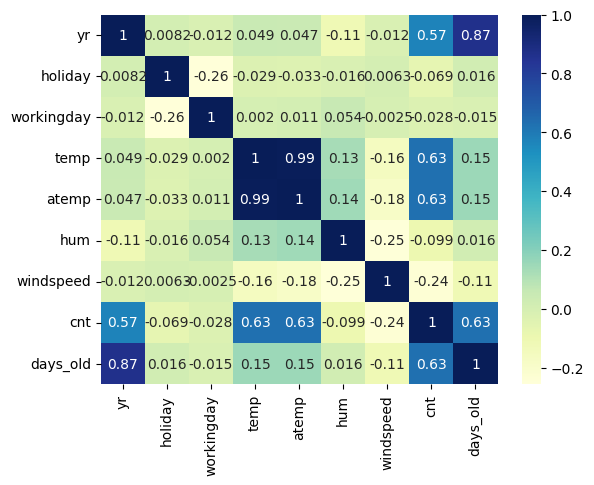

In [ ]:
#Lets observe the correlations between numeric variables
cor=bikesharing_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

Lets analyse catergorical variables with target variable

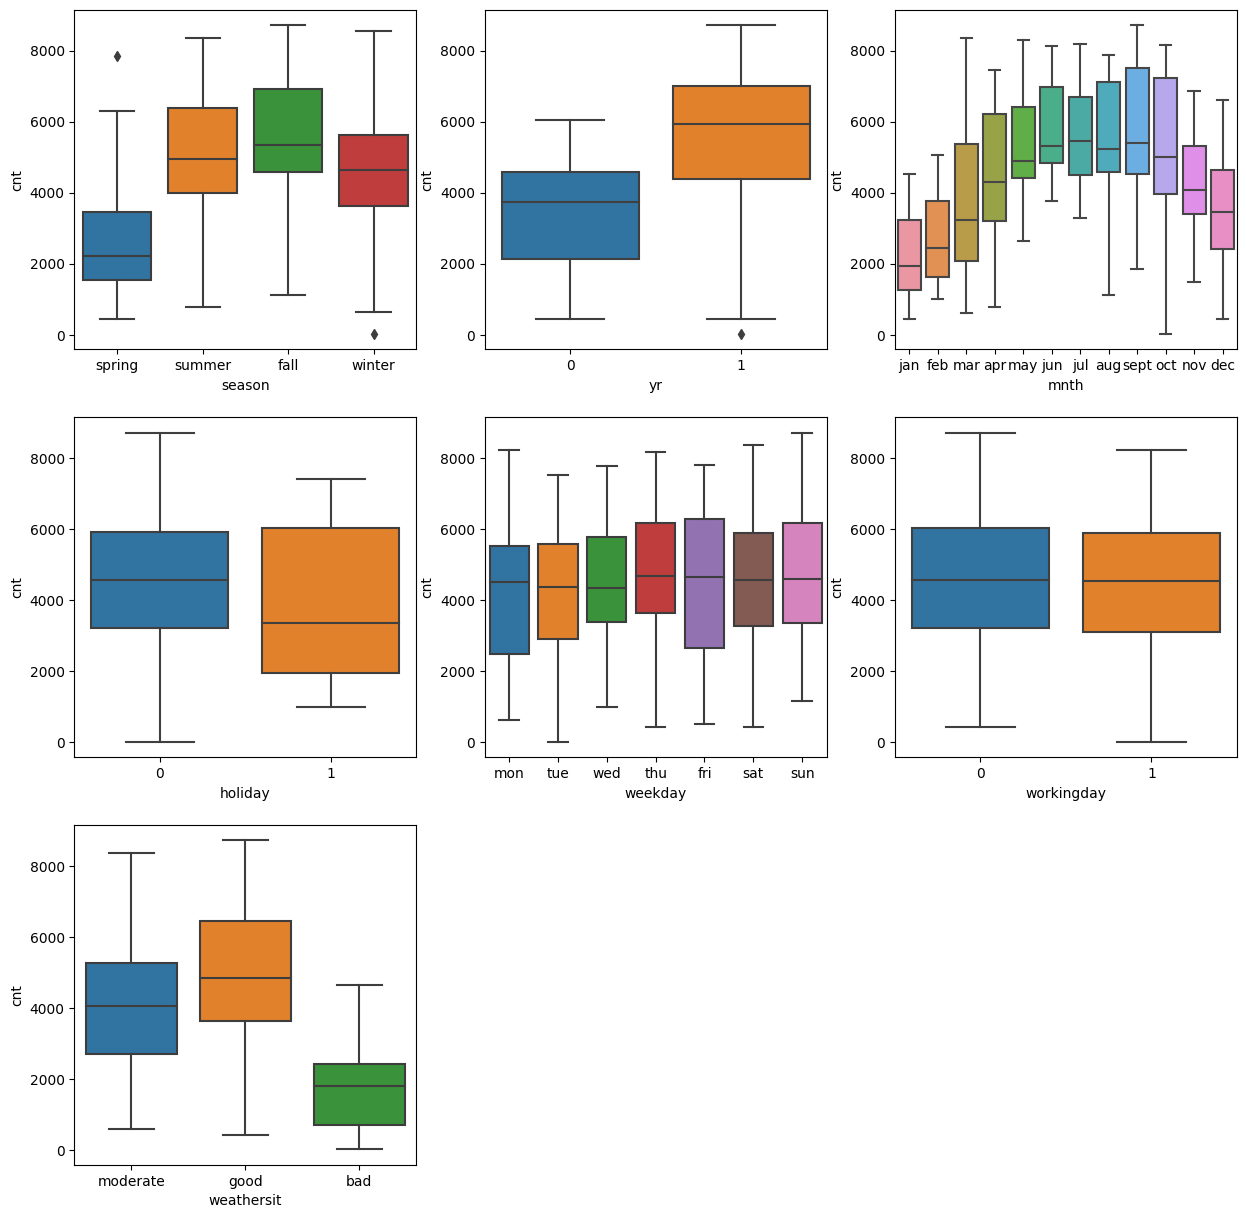

In [ ]:
#Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing_df, x=i[1], y='cnt')
plt.show()

**Observations:**

Here many insights can be drawn from the plots,they are:

*   From the season column we can see there is more demand in fall season.
*   We can say that there is more demand in the next year compared to previous year.
*   From jan to june there is increase in graph and September month has more demand for rental bikes and it decreased gradually in the next months.
*   We can observe little less demand on holidays.
*   From mon to fri demand increases and drops on Sat and again a bit increase on sun.Friday is considered to be having more demand.But this not giving us a clear idea.
*  Working day or not is not showing much significance as both looks same.
*   A good weathersit is adding up more demand for rental bikes.

**Bivariate analysis**

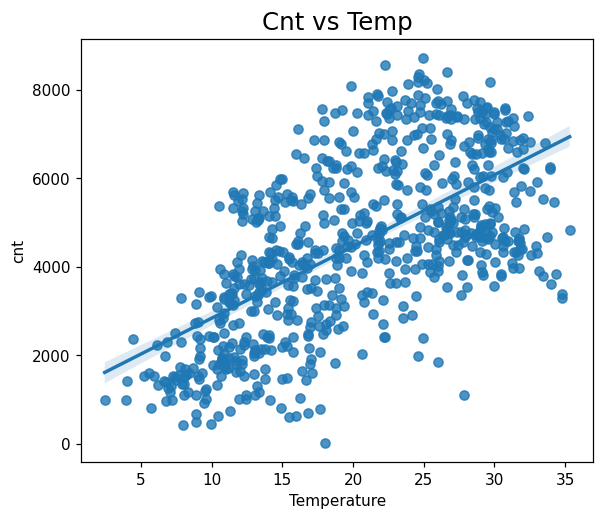

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikesharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()



*   temp variable is having linear relation with target variable cnt.
*   We can see that the cnt is increasing with temp.



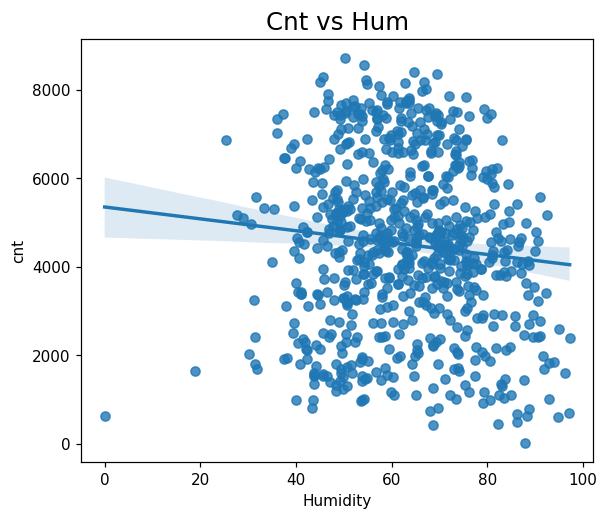

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikesharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()




*   There is negative linear relation between these two.
*   We can see the cnt variable slightly decreases with the increase in humidity.



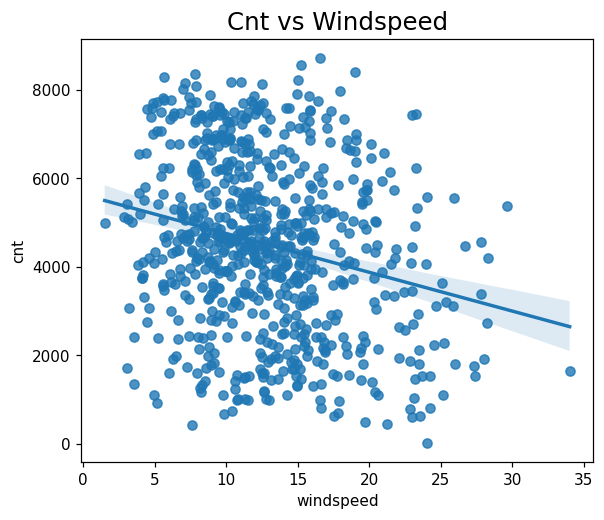

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikesharing_df,y="cnt",x="windspeed")
plt.show()


*   Same as above these two also having negative linear relation.
*   cnt decrease with increas of windspeed.



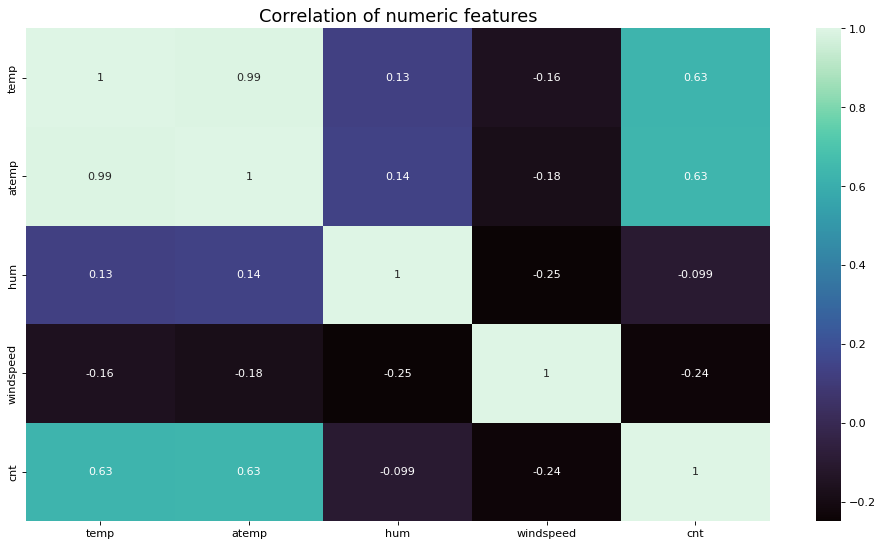

In [ ]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=80)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikesharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

Among these only temp and atemp are having good correlation with cnt.But both are acting almost same.So we can consider only one out of them further.Lets see this in model building later.

**STEP 5: DATA PREPARATION FOR LINEAR REGRESSION**

Creating dummy variables for all the categorical variables:

In [ ]:
bikesharing_df = pd.get_dummies(data=bikesharing_df,columns=["season","mnth","weekday"],drop_first=True)
#Lets not drop from weathersit column while creating dummy because we may lose data
bikesharing_df = pd.get_dummies(data=bikesharing_df,columns=["weathersit"])

For creating dummy variables we use n-1 as we need to explain n values.

In [ ]:
#Lets check the columns present in the dataset now after creating dummy variables:
bikesharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [ ]:
#Check the dataset now:
bikesharing_df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days_old  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
0         0              1  ...          0            1            0   
1         1              1  ...          0            0            0   
2         2              1  ...          0            0            0   
3         3              1  ...          0            0            0   
4         4              1  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            0            0            1            0               0   
2            0            0            0            1               0   
3            0            1            0            0               0   
4            0            0            0            0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 32 columns]

**STEP 6: BUILDING THE MODEL**

Split the data into train and test sets.

In [ ]:
#Before splitting the dataset just check the shape once:
bikesharing_df.shape

(730, 32)

In [ ]:
#Lets load the y variable with only target that is cnt.
Y=bikesharing_df.pop('cnt')

In [ ]:
#Now x takes the remaining dataset which contains independent variables.
X=bikesharing_df

In [ ]:
#Lets split the data into a normal considerable ration 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#Lets inspect the X variable
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days_old  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882         0   
1   0        0           1  14.902598  17.68695  69.6087  16.652113         1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703         2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832         3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300         4   

   season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0              1              0  ...          0            1            0   
1              1              0  ...          0            0            0   
2              1              0  ...          0            0            0   
3              1              0  ...          0            0            0   
4              1              0  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            0            0            1            0               0   
2            0            0            0            1               0   
3            0            1            0            0               0   
4            0            0            0            0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

In [ ]:
#Lets check shape of these train and test variables
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


*Rescaling the features using MinMax Scaler*

In [ ]:
#Using sklearn lets rescale the continuous variables before that import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Make a list of all these continuos variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#For normalization use MinMax scaler
scaler = MinMaxScaler()

#Training set fitting and transforming
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [ ]:
#Lets check the train set after scaling
X_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.520548    0.027397    0.698630    0.550874    0.526518    0.654174   
std      0.500067    0.163398    0.459303    0.227231    0.212976    0.143648   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354221    0.353207    0.544598   
50%      1.000000    0.000000    1.000000    0.575304    0.563297    0.659940   
75%      1.000000    0.000000    1.000000    0.745079    0.698389    0.756977   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed    days_old  season_spring  season_summer  ...  mnth_sept  \
count  511.000000  511.000000     511.000000     511.000000  ...  511.00000   
mean     0.414873    0.512409       0.230920       0.258317  ...    0.09002   
std      0.185619    0.292268       0.421834       0.438138  ...    0.28649   
min      0.000000    0.000000       0.000000       0.000000  ...    0.00000   
25%      0.281934    0.254458       0.000000       0.000000  ...    0.00000   
50%      0.384732    0.521262       0.000000       0.000000  ...    0.00000   
75%      0.526481    0.770233       0.000000       1.000000  ...    0.00000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.00000   

       weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
count   511.000000   511.000000   511.000000   511.000000   511.000000   
mean      0.148728     0.142857     0.133072     0.135029     0.156556   
std       0.356169     0.350270     0.339986     0.342090     0.363738   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_wed  weathersit_bad  weathersit_good  weathersit_moderate  
count   511.000000      511.000000       511.000000           511.000000  
mean      0.133072        0.029354         0.624266             0.346380  
std       0.339986        0.168963         0.484786             0.476282  
min       0.000000        0.000000         0.000000             0.000000  
25%       0.000000        0.000000         0.000000             0.000000  
50%       0.000000        0.000000         1.000000             0.000000  
75%       0.000000        0.000000         1.000000             1.000000  
max       1.000000        1.000000         1.000000             1.000000  

[8 rows x 31 columns]

In [ ]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  0.322150  0.639330   0.327101   
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   

     days_old  season_spring  season_summer  ...  mnth_sept  weekday_mon  \
683  0.936900              0              0  ...          0            0   
645  0.884774              0              0  ...          0            0   
163  0.223594              0              1  ...          0            0   
360  0.493827              1              0  ...          0            0   
640  0.877915              0              0  ...          0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
683            0            0            0            0            0   
645            0            0            0            1            0   
163            0            0            0            0            1   
360            0            0            1            0            0   
640            0            0            1            0            0   

     weathersit_bad  weathersit_good  weathersit_moderate  
683               0                0                    1  
645               0                0                    1  
163               0                1                    0  
360               0                0                    1  
640               0                0                    1  

[5 rows x 31 columns]

Model building using RFE and automated approach

In [ ]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15,verbose=0, importance_getter='auto')
rfe.fit(X_train,Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [ ]:
#Lets check the columns and their weigths after RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 6),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 4),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

RFE Manual Elmination

In [ ]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [ ]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_may', 'mnth_nov',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [ ]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [ ]:
X_train_rfe.shape

(511, 15)

**Building the model using selected RFE features**

**MODEL 1**

In [ ]:
#Lets write a function to build a model using statsmodel api which takes columns as parameters
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(Y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [ ]:
#For model 1 lets select all the features that are given by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.70e-181
Time:                        05:01:23   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

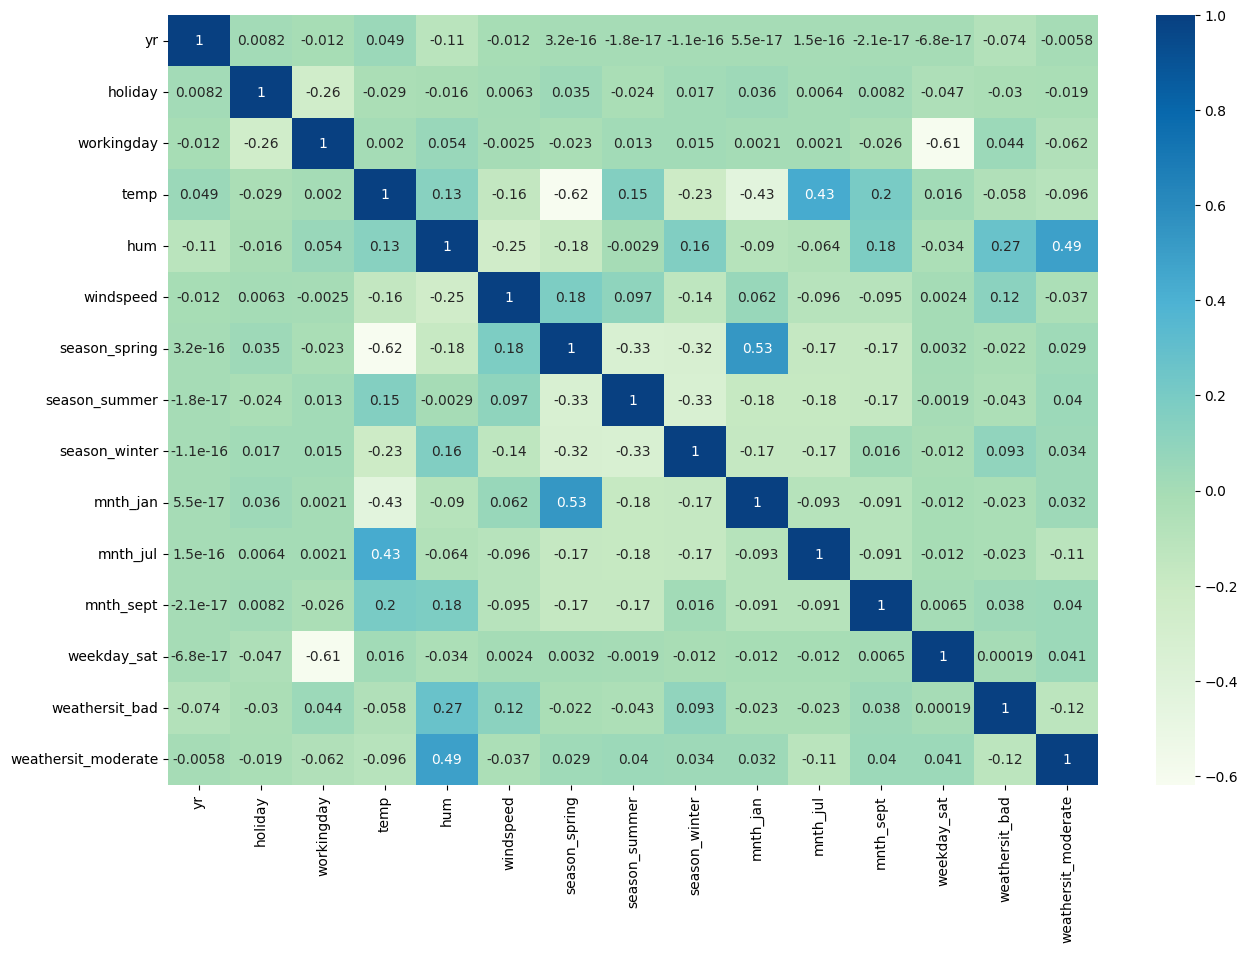

In [ ]:
# Lets check the correlation of features selected by RFE with target column.
# Lets check the impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikesharing_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

**Lets build the other models by dropping one feature (variable) at once for better model evaluation**

**MODEL 2**

In [ ]:
# Lets drop the variable mnth_jan as it has negative coefficient and it is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday','hum', 'temp',  'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.35e-182
Time:                        05:01:24   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

**MODEL 3**

In [ ]:
#From the above model we can see hum is having high vif and p value Lets drop this
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          3.37e-180
Time:                        05:01:25   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

**MODEL 4**

In [ ]:
# Lets drop the variable holiday as it has negative coefficient
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.51e-178
Time:                        05:03:20   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

**MODEL 5**

In [ ]:
# Lets drop the variable mnth_jul as it has negative coefficient and it seems insignificant
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          8.20e-179
Time:                        05:05:12   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

**MODEL 6**

In [ ]:
# Lets drop the variable temp as it is having high vif
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          4.14e-147
Time:                        05:09:42   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

In [ ]:
#We can notice that removing temp is not giving us good R squared value.So we can look into it in further models.

**MODEL 7**

In [ ]:
#Lets replace season spring with mnth July for further analysis
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.84e-92
Time:                        05:11:30   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

In [ ]:
#This model underfits as the R squared and adjusted R squared values show a fall

**MODEL 8**

In [ ]:
# Removing windspeed which is having high negative coefficient and check
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.75e-142
Time:                        05:18:30   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

In [ ]:
#This seems to be a better model than the previous one as we got a good Rsq value

**MODEL 9**

In [ ]:
#Lets check with weekday sunday which we didnt get during RFE replace Weekday sat with sun

In [ ]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          3.20e-142
Time:                        05:23:00   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

**MODEL 10**

In [ ]:
#Still this is not an expected model
#Lets drop summer as we guess in summer bikes are not that most used and drop working day too
#Lets add temp now again
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          9.73e-178
Time:                        05:25:38   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

Observations:

*   VIF values are good to be accepted.
*   P values for all features are almost Zero.
*   The difference between Rsq and adjusted Rsq is very less.
*   And we have got good statistics(Rsq,adjusted Rsq and F stat).
*   We dont see any insignificant variables here.
*   Almost all the features seems to be accepted and no need to drop any from now.
*   We can keep it as our final model and lets move to model evaluation.







In [ ]:
#Lets build a model with all columns for selecting the features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [ ]:
#Lets build the final model using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],Y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164281 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


**STEP 7: MODEL EVALUATION**

RESIDUAL ANALYSIS

In [ ]:
Y_train_pred = lr.predict(X_train[cols])

In [ ]:
#Create a histogram to describe the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

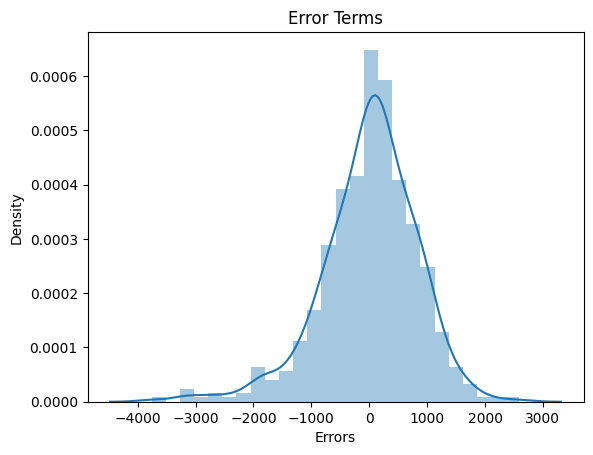

In [ ]:
plot_res_dist(Y_train, Y_train_pred)

We can see a normal distribution with mean almost zero which means everything seems to be fine.

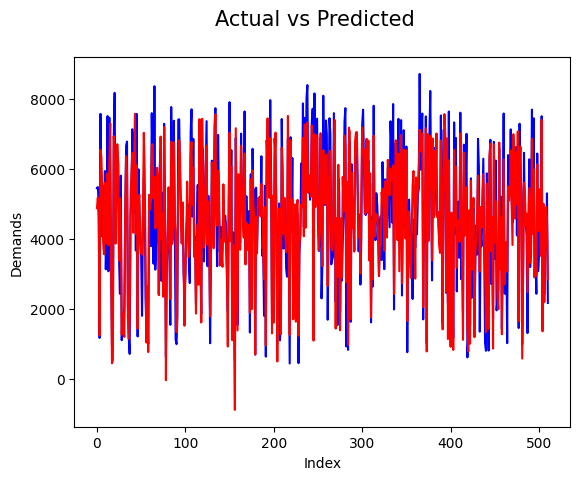

In [ ]:
#Lets see how the Actual vs Predicted looks
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,Y_train, color="blue")
plt.plot(c,Y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()


This shows actual and predicted are almost overlapped and looks the same.

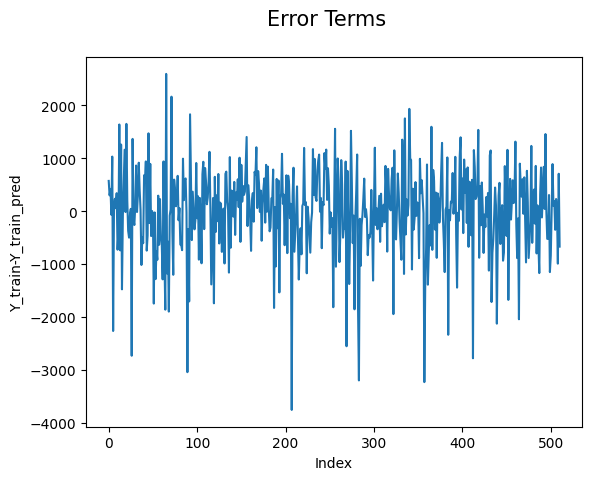

In [ ]:
# Lets see the Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,Y_train-Y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Y_train-Y_train_pred')
plt.show()

We can see how the error terms are independent of each other.

In [ ]:
#Now lets check the R squ value
r2_score(Y_train,Y_train_pred)

0.8158045196281631

**Observation:**
The R sq value we got from our model is 81.6 and here also same so this seems good.

Lets check the linearity among actual and predicted

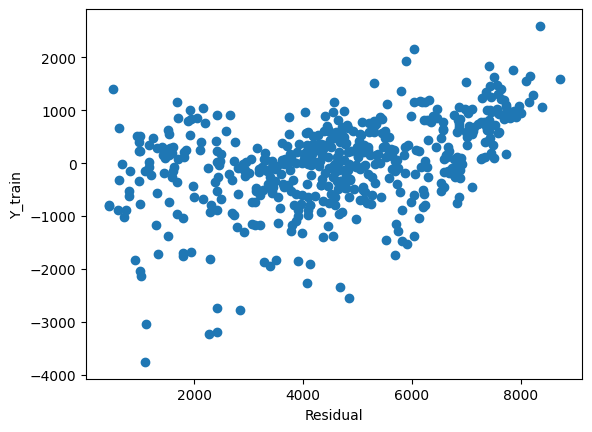

In [ ]:
# Lets use a scatter plot here
residual = (Y_train - Y_train_pred)
plt.scatter(Y_train,residual)
plt.ylabel("Y_train")
plt.xlabel("Residual")
plt.show()

Predicting values for test data set

In [ ]:
#Lets scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
#The columns we got from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
Y_test_pred = lr.predict(X_test[cols])

R square values for test prediction

In [ ]:
# Lets find out the R squared value for test and predicted test data sets.
r2_score(Y_test,Y_test_pred)

0.8127228702995222

**Homoskedasticity**

Text(0, 0.5, 'Y_test_pred')

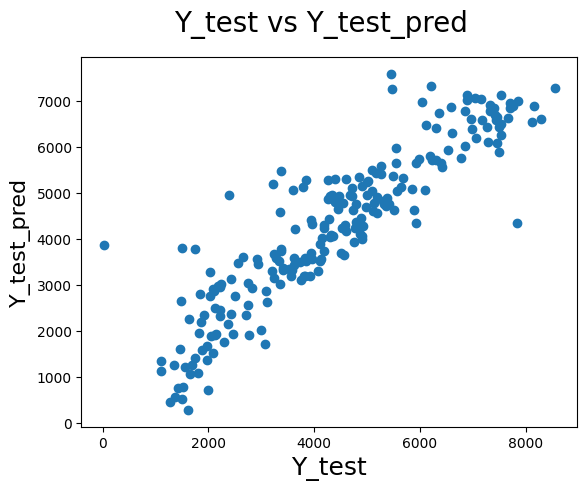

In [ ]:
#As observed thet Rsq value for train set is 81.5 and here we got 81.2 which are good values with very less difference.
# Lets plot y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_test_pred)
fig.suptitle('Y_test vs Y_test_pred', fontsize = 20)              # Title of the plot
plt.xlabel('Y_test', fontsize = 18)                               # X-label
plt.ylabel('Y_test_pred', fontsize = 16)

We can see linear graph here which means there are no error terms affecting the predictions.

Lets plot against test and predicted test values

In [ ]:
#Lets define a function to plot Actual vs Predicted
#By taking Actual and Predicted values as input along with the scale and adding the title for understanding
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot Title
    plt.xlabel('Index', fontsize=18)                                           # X-label
    plt.ylabel('Counts', fontsize=16)                                          # Y-label

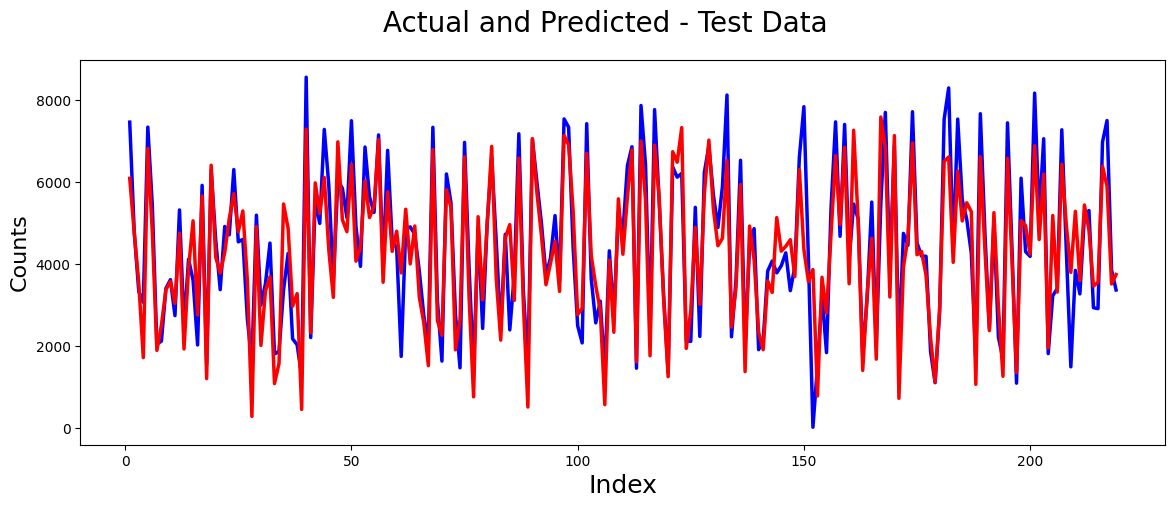

In [ ]:
#Now plot Actual vs Predicted for Test Data
plot_act_pred(Y_test,Y_test_pred,len(Y_test)+1,'Test Data')

We can see a good overlap of test and predicted test values which means actual data is very close to predictions.

Lets plot error terms for test data.

In [ ]:
#Lets do this using a function again
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)                   # Plot heading
    plt.xlabel('Index', fontsize=18)                           # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)       # Y-label

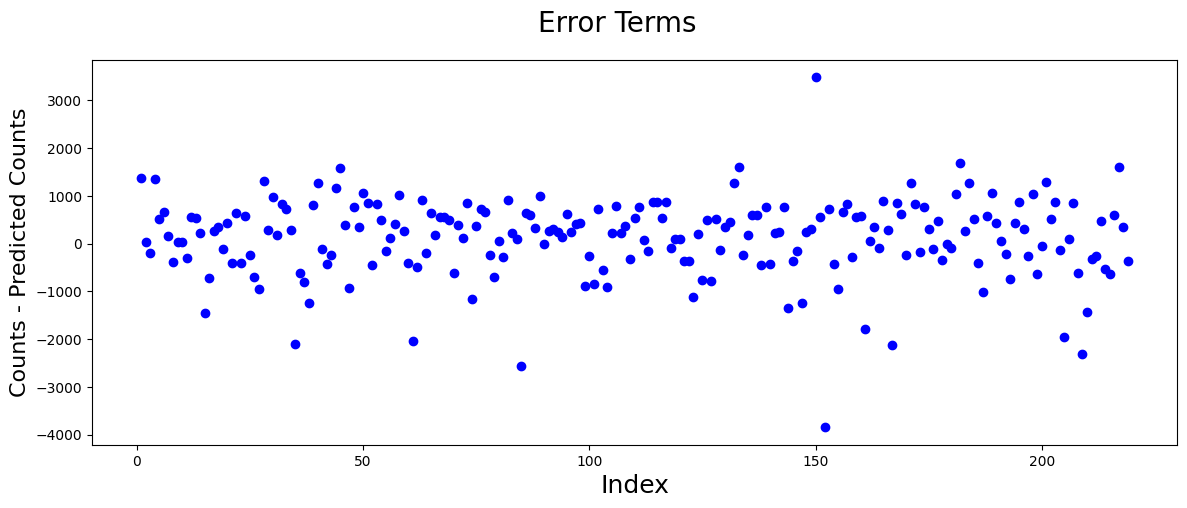

In [ ]:
#Lets plot error terms for test data
plot_err_terms(Y_test,Y_test_pred)

**Observation:** Here we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and these parameters are good enough to explain the model better.

**STEP 8: MAKING PREDICTIONS**

In [ ]:
#Lets check the dataset once before that
bikesharing_df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days_old  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882         0   
1   0        0           1  14.902598  17.68695  69.6087  16.652113         1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703         2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832         3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300         4   

   season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0              1              0  ...          0            1            0   
1              1              0  ...          0            0            0   
2              1              0  ...          0            0            0   
3              1              0  ...          0            0            0   
4              1              0  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            0            0            1            0               0   
2            0            0            0            1               0   
3            0            1            0            0               0   
4            0            0            0            0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

**Interpreting the model**

Lets do this by using RFE (manual approach) as we can impute features to get a better model

In [ ]:
#Lets rebuild the final model manual + RFE approach using statsmodel(for interpretation)
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          9.73e-178
Time:                        06:23:34   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

**Interepretation of results:**

Analysing the above model, the comapany should focus on the following features:

*   The company should focus on expanding business during Spring and in the month of september.
*   Using the previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
*   There would be less bookings during Light Snow or Rain, the company could probably use this time for servicing the bikes without affecting the business.
*   Finally the company can come up with good offers in the time of spring season when the weather is good and pleasant. And also it can focus more in the month of spetember.

**CONCLUSION:**

The significant variables from the final model to predict the demand are:

*   holiday
*   temp
*   hum
*   windspeed
*   season
*   months
*   sunday
*   year
*   weathersit

